In [17]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # esko kaam chai running ran runner jasto saab xa bhaney run ma convert garney
from sklearn.feature_extraction.text import TfidfVectorizer

In [135]:
df=pd.read_csv('bbc-text.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


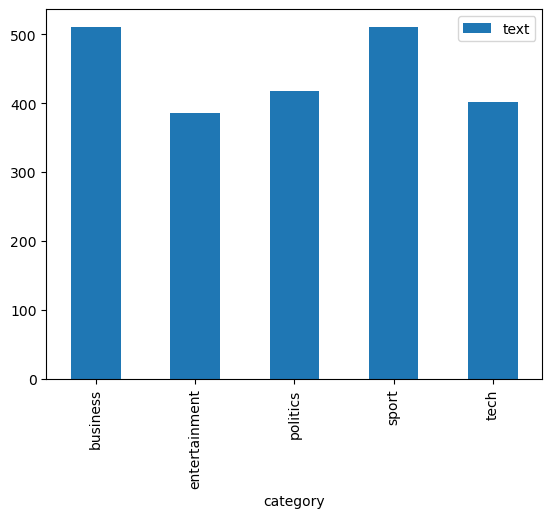

In [136]:
# Analyzing the data
df.groupby('category').count().plot.bar()
plt.show()

In [137]:
data=df['text'][0].split()
cp=['her','hers','herself',"it's",'itself','theirs','themselves','whom',"that'll",'those','am','was','were','had','having','does','did','doing','if','until','while','against','between','during','before','after','above','below','down','over', 'under']
data=data+cp
print(len(data))

768


In [138]:
words=stopwords.words('english')
stemmer=PorterStemmer()


In [139]:
for i in data:
    for j in words:
        if j in data :
            data.remove(j)

In [77]:
# a=['ram','shyam','gopal','harka','sarita','makurey','pushpa','harls','porlas','ram','shyam','gopal','harka','sarita','ram','sita','harlasfd','hrerut','ram']
# b=['ram','gopal','shyam','sita','pushpa']
# for i in a:
#     for j in b:
#         if j in a:
#             a.remove(j)
# a

['harka',
 'sarita',
 'makurey',
 'harls',
 'porlas',
 'harka',
 'sarita',
 'harlasfd',
 'hrerut']

In [160]:
df['cleaned']=df['text'].apply(lambda x : " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-z]",' ',x).split() if i not  in words])).lower()

AttributeError: 'Series' object has no attribute 'lower'

In [159]:
df.drop('cleaned',axis=1)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [161]:
len(df['cleaned'][3])

2004

In [163]:
df['cleaned'][3]

'yead face newcastl in fa cup premiership side newcastl unit face a trip to ryman premier leagu leader yead in the fa cup third round the game arguabl the highlight of the draw is a potenti money spinner for non leagu yead who beat slough in the second round confer side exet citi who knock out doncast on saturday will travel to old trafford to meet holder manchest unit in januari arsen were drawn at home to stoke and chelsea will play host to scunthorp the onli other non leagu side in the draw are hinckley unit who held brentford to a goalless draw on sunday they will meet leagu one leader luton if they win their replay against martin allen s team at griffin park a number of premiership team face difficult away game against championship side on the weekend of januari third place everton visit plymouth liverpool travel to burnley crystal palac go to sunderland fulham face carl cup semi finalist watford bolton meet ipswich while aston villa were drawn against sheffield unit premiership s

In [ ]:
# Training model
